In [127]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from scipy import optimize
import pandas as pd

In [2]:
DIM = 2
SIZE = 300
SEED = 0

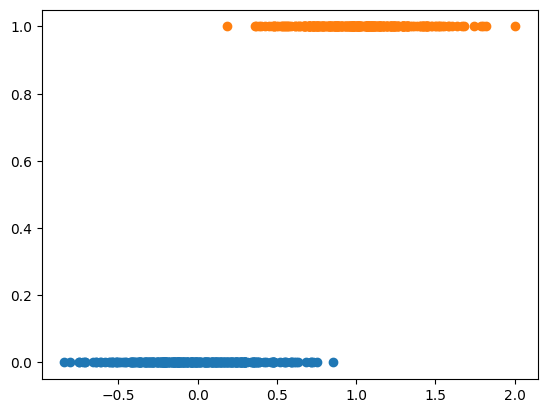

In [3]:
np.random.seed(SEED)
mean_0 = np.zeros(DIM)
mean_1 = np.ones(DIM)
cov = 0.1*np.eye(DIM)
x_0 = np.random.multivariate_normal(mean_0, cov, SIZE).T
x_1 = np.random.multivariate_normal(mean_1, cov, SIZE).T
plt.scatter(x_0[0,:], np.zeros(SIZE))
plt.scatter(x_1[0,:], np.ones(SIZE))
plt.show();

In [4]:
X = np.hstack([x_0, x_1]).T
y = np.hstack([np.zeros(SIZE), np.ones(SIZE)])

In [5]:
X, y = shuffle(X, y, random_state=SEED)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty=None, solver="newton-cg", max_iter=1000, fit_intercept=False).fit(X, y)
clf.coef_

array([[1.94839635, 1.56782911]])

In [7]:
clf.intercept_

array([0.])

In [8]:
# w = np.hstack([clf.coef_, np.expand_dims(clf.intercept_, axis=0)])[0]
# w
w = clf.coef_[0]
w

array([1.94839635, 1.56782911])

In [9]:
X.shape

(600, 2)

In [10]:
# X = np.hstack((X, np.ones((2 * SIZE,1))))

In [64]:
def sigma(w, x):
    return 1/(1 + np.exp(-w @ x))

def d_sigma(w, x):
    return sigma(w, x) * (1 - sigma(w, x))

def f(w):
    return X.T @ (y - sigma(w, X.T)) #+ 0.00001 * w.T @ w + 0.05 * w
    
def d_f(w):
    D = np.diag(d_sigma(w, X.T))
    return -X.T @ D @ X

# w = np.array([0.51409333,  0.52904235,  0.33494712,  0.4351906 ,  0.27935354,
#          0.30012803,  0.30883392,  0.29504728,  0.27637345,  0.3003679 ,
#          0.30127951,  0.36737025,  0.26878427,  0.35379398,  0.37709758,
#          0.45847144,  0.34538089,  0.43590297,  0.28163673,  0.33024509,
#          0.37175087,  0.33498046,  0.34486673,  0.24858891,  0.37431608,
#          0.40295966,  0.35666353,  0.34829042,  0.16096415,  0.29554732,
#          0.48607417,  0.47035826,  0.22465575,  0.30604755,  0.39645169,
#          0.21058362,  0.35600106,  0.28668081,  0.40763017,  0.37587282,
#          0.39561692,  0.36654178,  0.25533244,  0.49512564,  0.35834778,
#          0.40841047,  0.35655292,  0.40023344,  0.42408851,  0.40510101,
#          0.49983678,  0.31191866,  0.36217317,  0.30294448,  0.3130839 ,
#          0.27749227,  0.43302782,  0.31376699,  0.39195785,  0.43212839,
#          0.35066795,  0.28476496,  0.26764928,  0.26234406,  0.37233159,
#          0.47678132,  0.32070137,  0.30284251,  0.46220326,  0.35664036,
#          0.30873957,  0.32220017,  0.46216404,  0.24946114,  0.34381349,
#          0.4696369 ,  0.20107757,  0.44789044,  0.40104625,  0.25703852,
#          0.31146967,  0.21996238,  0.3354346 ,  0.34182984,  0.30680137,
#          0.49808241,  0.34237727,  0.32639422,  0.33540364,  0.23281954,
#          0.43181393,  0.39309323,  0.37922209,  0.46108461,  0.36030612,
#          0.34727818,  0.45281439,  0.43789445,  0.39031997,  0.41246397,
#         -8.38765672])

# w = np.array([22.70472372, 29.08911496, -28.37547028])

sigma(w, X[0])
acc = np.zeros_like(w)
for i in range(2*SIZE):
    acc += X[i] * (y[i] - sigma(w, X[i]))

from scipy.optimize import fsolve
x0 = fsolve(f, np.zeros_like(w), xtol=0.00001)
# print(w)
# print(x0)
# print(w-x0)
# print(w[-1], x0[-1])
# print(d_f(w) - d_f(x0))
# print(f(-0.2*np.ones(DIM+1)))
# d_f(-0.2*np.ones(DIM+1)).shape
# optimize.newton(f, np.zeros(DIM+1), maxiter=50)
# f(-0.2*np.ones(DIM+1))
# print(np.ones(DIM+1).shape)
# print(X.T.shape)
# optimize.newton(f, np.zeros(DIM+1), fprime=d_f)

In [12]:
loss = np.sum(y - sigma(w, X.T))
loss2 = np.sum(y - sigma(x0, X.T))
print(loss, loss2)

-134.44709673560166 -134.44711038398606


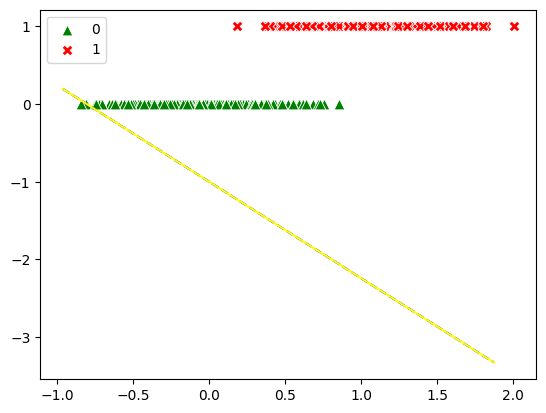

In [13]:
sns.scatterplot(x = x_0[0,:],
                y = np.zeros(SIZE),
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = x_1[0,:],
                    y = np.ones(SIZE),
                    marker = "X",
                    color = "red",
                    s = 60)
# plt.scatter(x_0[0,:], np.zeros(SIZE))
# plt.scatter(x_1[0,:], np.ones(SIZE))

ax.legend(["0", "1"])
# ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(x0[-1] + x0[0] * x_boundary) / x0[1]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")

# x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(w[-1] + w[0] * x_boundary) / w[1]

sns.lineplot(x = x_boundary, y = y_boundary, color="yellow")
ax.lines[0].set_linestyle("--")
plt.show();

In [14]:
x_0.shape

(2, 300)

In [15]:
X.shape

(600, 2)

In [16]:
x0

array([1.94839724, 1.56782998])

In [17]:
w

array([1.94839635, 1.56782911])

In [18]:
x0-w

array([8.92560091e-07, 8.71358961e-07])

In [66]:
# https://math.stackexchange.com/questions/2496649/derivative-and-second-derivative-of-scaled-logistic

def sigma(w, x):
    return 1/(1 + np.exp(-w.T @ x)) + 0.0001
    
# def sigma(w, x):
#     x = -w.T @ x
#     if x > 0:   
#         z = np.exp(-x)
#         return 1/(1+z)
#     else:
#         z = np.exp(x)
#         return z/(1+z)

# from scipy.special import expit
# def sigma(w, x):
#     return expit(w @ x)

def d_sigma(w, x):
    return sigma(w, x) * (1 - sigma(w, x)) + 0.00001

def d2_sigma(w, x):
    k = w.T @ x
    # return (1-np.exp(k))/(np.exp(k)+1)**3*np.exp(k) + 0.00001
    return sigma(w, x) * (1 - sigma(w, x)) * (1 - 2 * sigma(w, x)) + 0.00001

def f(w, x):
    return X.T @ (y - sigma(w, x))
    
def d_f(w, x):
    D = np.diag(d_sigma(w, x))
    return -x @ D @ x

Denote the data likelihood as:
\begin{align}
    L = \prod_{i=1}^n \text{exp}\left\{ y_i \log (\sigma(\vec w^\top \vec x_i)) + (1-y_i) \log (1-\sigma(\vec w^\top \vec x_i)) \right\}\\
    \log (L) = \sum_{i=1}^n \left\{ y_i \log (\sigma(\vec w^\top \vec x_i)) + (1-y_i) \log (1-\sigma(\vec w^\top \vec x_i)) \right\}
\end{align}

\begin{align}
    \log L(\vec w_{t+1}) &\approx \log L(\vec w_t) 
    + (\vec w_{t+1} - \vec w_t)^\top \left \{ y_i \frac{(\sigma'(\vec w^\top \vec x_i))}{(\sigma(\vec w^\top \vec x_i))} + (1-y_i) \frac{-\sigma'(\vec w^\top \vec x_i)}{(1-\sigma(\vec w^\top \vec x_i))}  \right\} \nonumber \\
    &+ \frac{1}{2}(\vec w_{t+1} - \vec w_t)^\top\left\{ y_i \left[\frac{\sigma''(\vec w^\top \vec x_i)}{\sigma(\vec w^\top \vec x_i)} - \left(\frac{\sigma'(\vec w^\top \vec x_i)}{\sigma(\vec w^\top \vec x_i)}\right)^2\right] + (1-y_i) \left[ -\frac{\sigma''(\vec w^\top \vec x_i)}{1-\sigma(\vec w^\top \vec x_i)} -\frac{\sigma'(\vec w^\top \vec x_i)^2}{(1-\sigma(\vec w^\top \vec x_i))^2}\right] \right\} (\vec w_{t+1} - \vec w_t)
\end{align}

In [20]:
from scipy.optimize import minimize

def log_likelihood(y_i, w_i, x_i):
    return y_i * np.log(sigma(w_i, x_i)) + (1 - y_i) * np.log(1 - sigma(w_i, x_i))

def recursive_bayes_step():
    # initialize (coeffs plus intercept)
    w_0 = np.random.multivariate_normal(np.zeros(DIM+1), np.eye(DIM+1), 1).T
    log_like_prev = 0
    w_i = w_0
    # train
    for x_i, y_i in zip(X,y):
        def taylor(z):
            # print('here')
            # print('z', z)
            ans = -log_like_prev  # constant
            # print(1, ans)
            ans -= (z - w_i.T[0]).T * (y_i * d_sigma(w_i, x_i) / sigma(w_i, x_i) + (1-y_i) * -d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i))) # linear
            # print(2, ans)
            ans -= 1/2* (z - w_i.T[0]).T @ (z - w_i.T[0]) * (y_i * (d2_sigma(w_i, x_i) / sigma(w_i, x_i) - (d_sigma(w_i, x_i) / sigma(w_i, x_i))**2) + (1 - y_i) * (-d2_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)) - ((d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)))**2))) # quadratic
            # print(3, ans)
            ans += 0.1 * z @ z + 0.005 * np.sqrt(z @ z)
            return ans[0]
        res = minimize(taylor, np.zeros(DIM+1), method='Nelder-Mead', tol=1e-6)
        w_i_new = res.x
        w_i = w_i_new
        log_like_prev = taylor(w_i_new)        
    return w_i_new

In [21]:
# w_new = recursive_bayes_step()
# w_new

In [22]:
x0.shape

(2,)

In [23]:
np.zeros(DIM+1).shape

(3,)

In [24]:
y_i = y[0]
x_i = X[0]
w_i = np.random.multivariate_normal(np.zeros(DIM+1), np.eye(DIM+1), 1).T
y_i * d_sigma(w_i, x_i) / sigma(w_i, x_i) + (1-y_i) * -d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [ ]:
print(y_i, x_i.shape, w_i.shape)

In [ ]:
[y_i * (d2_sigma(w_i, x_i) / sigma(w_i, x_i) - (d_sigma(w_i, x_i) / sigma(w_i, x_i))**2) + (1 - y_i) * (-d2_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)) - ((d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)))**2))] # quadratic

In [ ]:
z = np.ones(3)
(z - w_i.T[0]).T @ (z - w_i.T[0]) * (y_i * (d2_sigma(w_i, x_i) / sigma(w_i, x_i) - (d_sigma(w_i, x_i) / sigma(w_i, x_i))**2) + (1 - y_i) * (-d2_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)) - ((d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)))**2))) # quadratic

In [ ]:
z - w_i

In [ ]:
z

In [ ]:
w_i

In [ ]:
w_i.T[0]

In [ ]:
w_i.T.ravel()

In [ ]:
(z - w_i.T[0]).T @ (z - w_i.T[0])

In [ ]:
z.T@z

In [ ]:
# sns.scatterplot(x = x_0[0,:],
#                 y = np.zeros(SIZE),
#                 marker = "^",
#                 color = "green",
#                 s = 60)
# ax = sns.scatterplot(x = x_1[0,:],
#                     y = np.ones(SIZE),
#                     marker = "X",
#                     color = "red",
#                     s = 60)
# # plt.scatter(x_0[0,:], np.zeros(SIZE))
# # plt.scatter(x_1[0,:], np.ones(SIZE))

# ax.legend(["0", "1"])
# # ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

# x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
# y_boundary = -(x0[-1] + x0[0] * x_boundary) / x0[1]

# sns.lineplot(x = x_boundary, y = y_boundary, color="blue")

# # x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
# y_boundary = -(w[-1] + w[0] * x_boundary) / w[1]

# sns.lineplot(x = x_boundary, y = y_boundary, color="orange")
# ax.lines[0].set_linestyle("--")

# # x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
# y_boundary = -(w_new[-1] + w_new[0] * x_boundary) / w_new[1]

# sns.lineplot(x = x_boundary, y = y_boundary, color="black")
# ax.lines[0].set_linestyle("--")
# plt.show();

In [ ]:
# w_new

In [ ]:
w

In [ ]:
x0

In [25]:
from scipy.optimize import minimize

# def log_likelihood(y_i, w_i, x_i):
#     return y_i * np.log(sigma(w_i, x_i)) + (1 - y_i) * np.log(1 - sigma(w_i, x_i))

def recursive_bayes_step_2():
    # initialize (coeffs plus intercept)
    w_0 = np.random.multivariate_normal(np.zeros(DIM), np.eye(DIM), 1)[0]
    print(w_0.shape)
    log_like_prev = 0
    w_i = w_0
    Q = [-0.12 * np.eye(DIM)]
    l = [np.zeros(DIM)]
    # train
    ctr = 0
    for x_i, y_i in zip(X,y):
        # print(ctr)
        ctr += 1
        print(x_1)
        def taylor(z):
            alpha = 0.5 * (y_i * (d2_sigma(w_i, x_i) / sigma(w_i, x_i) - (d_sigma(w_i, x_i) / sigma(w_i, x_i))**2) + (1 - y_i) * (-d2_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)) - ((d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)))**2)))
            beta = (y_i * d_sigma(w_i, x_i) / sigma(w_i, x_i) + (1-y_i) * -d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i))) 
            # 0.5 * (z - w_i.T[0]).T @ (z - w_i.T[0]) *
            Q[0] += x_i @ x_i.T * alpha
            l[0] += x_i * beta
            # print('start')
            # print('q', -Q[0])
            # print(z.T @ Q[0] @ z)
            # print(l[0] @ z)
            # print('eval')
            # print(-1*(z.T @ Q[0] @ z + l[0] @ z))
            # print('end')
            return -1*(z.T @ Q[0] @ z + l[0] @ z) #- 1/150*z.T@z
        def deriv(z):
            alpha = 0.5 * (y_i * (d2_sigma(w_i, x_i) / sigma(w_i, x_i) - (d_sigma(w_i, x_i) / sigma(w_i, x_i))**2) + (1 - y_i) * (-d2_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)) - ((d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)))**2)))
            beta = (y_i * (d2_sigma(w_i, x_i) / sigma(w_i, x_i) - (d_sigma(w_i, x_i) / sigma(w_i, x_i))**2) + (1 - y_i) * (-d2_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)) - ((d_sigma(w_i, x_i) / (1 - sigma(w_i, x_i)))**2))) # quadratic
            return -1*(Q[0] @ z + l[0]) #-1/150*z
        def hessian(z):
            return -1*Q[0] #- 1/150
        # res = minimize(taylor, np.zeros(DIM+1), method='Nelder-Mead', tol=1e-6)
        res = minimize(taylor, np.zeros(DIM), method='Newton-CG',jac=deriv, hess=hessian, tol=1e-6)
        # TRY SGD OR SOME KIND OF LR ALGO HERE
        w_i_new = res.x #CHECK SOLUTION AT EACH STEP FOR OSCILLATIONS
        w_i = w_i_new
        # print(w_i_new)
        log_like_prev = taylor(w_i_new)        
    return w_i_new
w_i_new = recursive_bayes_step_2()

(2,)
[[0.50971119 0.70136446 0.55539549 0.96506018 1.03641295 0.44901859
  1.19135577 0.95828683 1.07078555 1.40666385 1.21391567 0.9290831
  0.88136807 1.05797695 0.98224918 0.78265696 1.14741477 0.85649456
  0.7097014  1.25940853 0.9714187  1.32710913 0.61485403 1.32537797
  0.8100554  1.09072717 1.100295   1.07134372 0.97872558 0.8827731
  0.70504143 1.14308961 0.85827767 0.99259296 0.36621134 0.82743072
  0.38471466 1.06941502 0.70306795 1.44998689 0.81298206 1.23887709
  0.79240796 1.6693881  0.98868914 1.10453755 0.52490049 0.83154459
  0.89050631 1.06260275 0.54306979 0.75060088 1.07425709 1.29613014
  1.40005274 0.7770843  0.77980218 1.41988176 0.74602439 1.32311855
  0.8776607  1.05816235 0.49345496 0.70502621 1.2569901  0.84019167
  0.83950884 1.7896841  1.17835516 0.96700369 0.62760102 1.55497535
  0.75786371 1.00327274 0.42311939 1.24434756 1.14173179 0.99530158
  1.212053   1.01257535 0.85728545 1.22866445 1.22767885 0.9678405
  1.58489211 0.84219708 0.70935081 0.8845594  

In [26]:
def predict(theta, x):
    results = sigma(theta, x)
    return results > 0.5

p_w = predict(w, X.T)
p_x0 = predict(x0, X.T)
p_w_new = predict(w_i_new, X.T)
print("Training Accuracy x_0 (sklearn):", sum(p_x0==y)/len(y))
print("Training Accuracy w (full batch):", sum(p_w==y)/len(y))
print("Training Accuracy w_new (recursive):", sum(p_w_new==y)/len(y))

Training Accuracy x_0 (sklearn): 0.7733333333333333
Training Accuracy w (full batch): 0.7733333333333333
Training Accuracy w_new (recursive): 0.7683333333333333


In [27]:
w_i_new

array([0.38852932, 0.36680673])

In [28]:
w

array([1.94839635, 1.56782911])

In [29]:
x0

array([1.94839724, 1.56782998])

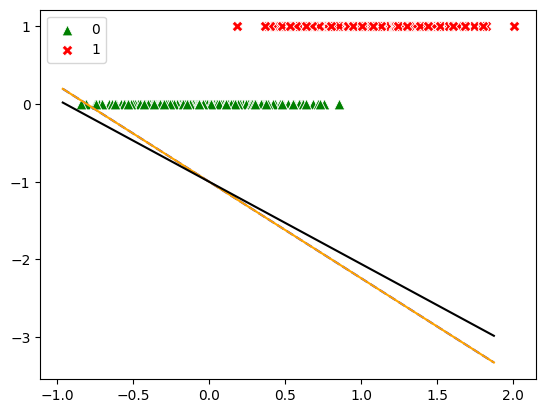

In [30]:
sns.scatterplot(x = x_0[0,:],
                y = np.zeros(SIZE),
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = x_1[0,:],
                    y = np.ones(SIZE),
                    marker = "X",
                    color = "red",
                    s = 60)
# plt.scatter(x_0[0,:], np.zeros(SIZE))
# plt.scatter(x_1[0,:], np.ones(SIZE))

ax.legend(["0", "1"])

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(x0[-1] + x0[0] * x_boundary) / x0[1]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")

# x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(w[-1] + w[0] * x_boundary) / w[1]

sns.lineplot(x = x_boundary, y = y_boundary, color="orange")
ax.lines[0].set_linestyle("--")

# x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(w_i_new[-1] + w_i_new[0] * x_boundary) / w_i_new[1]

sns.lineplot(x = x_boundary, y = y_boundary, color="black")
ax.lines[0].set_linestyle("--")
plt.show();

In [43]:
def recursive_bayes_step_3():
    # initialize (coeffs plus intercept)
    w_0 = np.random.multivariate_normal(np.zeros(DIM), np.eye(DIM), 1)[0]
    print(w_0.shape)
    log_like_prev = 0
    w_i = w_0
    Q = [-0.12 * np.eye(DIM)]
    l = [np.zeros(DIM)]
    # train
    ctr = 0
    for x_i, y_i in zip(X,y):
        # print(ctr)
        ctr += 1
        def deriv(w, x):
            return x.T * (y_i - sigma(w, x))
        # def hess(w, x):
        #     D = np.diag(d_sigma(w, x))
        # return -x @ D @ x
        w_i_new = w_i + 0.01 * deriv(w_i, x_i)
        w_i = w_i_new
        # print(w_i_new)
        # log_like_prev = taylor(w_i_new)        
    return w_i_new
w_i_iter = recursive_bayes_step_3()

(2,)


In [44]:
X[0]

array([0.56652763, 1.27374349])

In [45]:
sigma(w, X[0])

0.9570270716892415

In [46]:
def predict(theta, x):
    results = sigma(theta, x)
    return results > 0.5

p_w = predict(w, X.T)
p_x0 = predict(x0, X.T)
p_w_new = predict(w_i_new, X.T)
p_w_iter = predict(w_i_iter, X.T)

print("Training Accuracy x_0 (sklearn):", sum(p_x0==y)/len(y))
print("Training Accuracy w (full batch):", sum(p_w==y)/len(y))
print("Training Accuracy w_new (recursive):", sum(p_w_new==y)/len(y))
print("Training Accuracy w_new (online):", sum(p_w_iter==y)/len(y))

Training Accuracy x_0 (sklearn): 0.7733333333333333
Training Accuracy w (full batch): 0.7733333333333333
Training Accuracy w_new (recursive): 0.7683333333333333
Training Accuracy w_new (online): 0.7766666666666666


In [61]:
X.shape

(600, 2)

In [65]:
d_f(w_i_iter)

array([[-43.72040355, -32.69462796],
       [-32.69462796, -42.36336891]])

In [96]:
def d_f1(w):
    D = np.diag(d_sigma(w, X.T))
    return -X.T @ D @ X


# https://math.stackexchange.com/questions/2496649/derivative-and-second-derivative-of-scaled-logistic

def sigma(w, x):
    return 1/(1 + np.exp(-w.T @ x)) + 0.0001
    
# def sigma(w, x):
#     x = -w.T @ x
#     if x > 0:   
#         z = np.exp(-x)
#         return 1/(1+z)
#     else:
#         z = np.exp(x)
#         return z/(1+z)

# from scipy.special import expit
# def sigma(w, x):
#     return expit(w @ x)

def d_sigma(w, x):
    return sigma(w, x) * (1 - sigma(w, x)) + 0.00001

def d2_sigma(w, x):
    k = w.T @ x
    # return (1-np.exp(k))/(np.exp(k)+1)**3*np.exp(k) + 0.00001
    return sigma(w, x) * (1 - sigma(w, x)) * (1 - 2 * sigma(w, x)) + 0.00001

def f(w, x):
    return X.T @ (y - sigma(w, x))
    
def d_f(w, x):
    D = d_sigma(w, x[0])
    return -x.T * D @ x


d_f1(w_i_iter)

array([[-43.69882533, -32.67502564],
       [-32.67502564, -42.34317677]])

In [97]:
# X[0].reshape((1, -1)).T @ X[0].reshape((1, -1))
for d_f(w_i_iter, X[0].reshape((1, -1)))

array([[-0.04531895, -0.10189214],
       [-0.10189214, -0.2290876 ]])

In [98]:
pi = sigma(w_i_iter, X[0]) 
u = np.sqrt(pi * (1 - pi)) # weighting of update
u

0.3757538466911352

In [131]:
def isNaN(num):
    return num != num

def iwls(tol = 0.000001, maxit=100):
    x = X
    beta = np.zeros(x.shape[1])
    eta = x.dot(beta)
    eta = eta.reshape(len(eta), 1)
    prob = 1/(1+np.exp(-eta))

    # Lists to trace log-likelihood path and the development of
    # the coefficients during optimization.
    llpath = []
    coefpath = []

    i = 1  # iteration variable
    delta = 1  # likelihood difference between to iteration: break criteria
    converged = True  # Set to False if we do not converge before maxit
    eps = np.finfo(float).eps
    while delta > tol:

        # new weights
        w = np.sqrt(prob * (1-prob)) + eps
        if w.shape[1] > 1:
            w = np.diagonal(w).reshape(-1,1)
        beta = np.linalg.inv((x*w).T.dot(x*w)).dot((x*w).T).dot(
            eta*w + (y-prob) / w)

        # update latent response eta
        eta = x.dot(beta)

        # update response
        prob = 1/(1+np.exp(-eta))

        # update log-likelihood sum
        llpath.append(np.sum(y * eta - np.log(1+np.exp(eta))))
        coefpath.append(beta)

        # log.debug('Iteration %d, ll=%15.4f' % (i, llpath[-1]))

        if i > 1:
            delta = llpath[-1] - llpath[-2]

        # check if we converged
        if i == maxit:
            converged = False
            log.critical('IWLS solver for logistic model did not converge.')
            break

        i += 1

    # If converged, remove last likelihood and coefficient entries
    if converged:
        llpath = llpath[:-1]
        coefpath = coefpath[:-1]
        

    # xds = x
    # beta_se = pd.Series(np.sqrt(np.diag(np.linalg.inv((xds*w).T.dot(xds*w)))))
    # del xds

    # beta = coefpath[-1]

    # # Effective degree of freedom
    # edf = np.sum(np.diag((x*w).T.dot(x*w).dot(
    #     np.linalg.inv((x*w).T.dot(x*w)))))

    # # Keep coefficients destandardized
    # coef = pd.Series(beta.copy().squeeze())

    # # final logliklihood
    # ll = llpath[-1]

    # rval = {'edf': edf,
    #         'loglik': ll,
    #         'AIC': -2*ll + 2*edf,
    #         'BIC': -2*ll + np.log(len(x)) * edf,
    #         'converged': converged,
    #         'beta': beta,
    #         'beta_se': beta_se,
    #         'coef': coef,
    #         'iter': i-1}

    return coefpath[-1], coefpath

result, paths = iwls()

In [133]:
result.shape

(2, 600)

In [138]:
theta = np.zeros((DIM))
Hessian = 100*np.eye(DIM)
rirls_acc = []

def sigmoid(x):
    x = np.minimum(np.maximum(x, -10), 10)
    return 1/(1+np.exp(-x))

def rirls(X, y, theta0, Lambda0, theta):
    H_k = X
    P_k_old = Lambda0
    S_k = H_k @ P_k_old @ H_k.T + sigmoid(H_k @ theta0) * (1-sigmoid(H_k @ theta0)) 
    K_k = P_k_old @ H_k.T * 1/S_k
    theta = theta0 + K_k * (y - sigmoid(H_k @ theta0))
    Hessian = P_k_old - np.outer(K_k, K_k) * S_k
    return theta, Hessian

for t in range(len(X)):
    theta, Hessian = rirls(X[t], y[t], theta0=theta, Lambda0=Hessian, theta=theta)
    rirls_acc.append(((sigmoid(X.dot(theta)) > 0.5)==y).sum() / len(X))

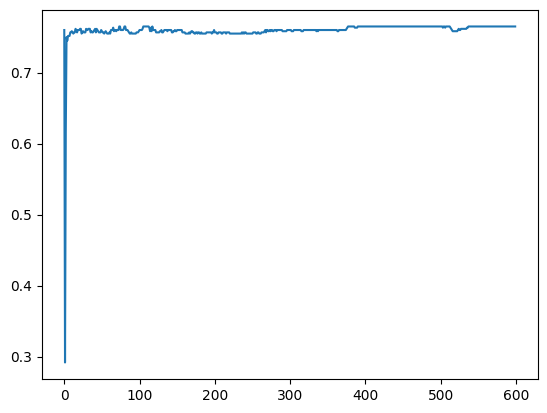

In [141]:
plt.plot(rirls_acc)

In [142]:
theta

array([0.69031931, 0.8495805 ])

In [143]:
def predict(theta, x):
    results = sigma(theta, x)
    return results > 0.5

p_w = predict(w, X.T)
p_x0 = predict(x0, X.T)
p_w_new = predict(w_i_new, X.T)
theta_preds = predict(theta, X.T)
print("Training Accuracy x_0 (sklearn):", sum(p_x0==y)/len(y))
print("Training Accuracy w (full batch):", sum(p_w==y)/len(y))
print("Training Accuracy w_new (recursive):", sum(p_w_new==y)/len(y))
print("Training Accuracy theta (IRLS):", sum(p_w_new==y)/len(y))

Training Accuracy x_0 (sklearn): 0.7733333333333333
Training Accuracy w (full batch): 0.7733333333333333
Training Accuracy w_new (recursive): 0.7683333333333333
Training Accuracy theta (IRLS): 0.7683333333333333


In [144]:
print(w)
print(x0)
print(w_i_new)
print(theta)

[1.94839635 1.56782911]
[1.94839724 1.56782998]
[0.38852932 0.36680673]
[0.69031931 0.8495805 ]
